In [1]:
import csv, datetime, pandas as pd

# Read data for January 8

In [3]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-08-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(2313, 12)


Finding out unique sources

In [4]:
unique_src = data.src.unique()
print(len(unique_src))

922


Unique ip sources frequency table

In [5]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

        Unique src  Count
405  185.107.94.10    245
362  181.214.87.12     49
909    95.215.1.37     47
874   89.160.72.72     43
714  46.166.165.47     41


In [6]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   1997
0       amun    316


Grouping by timestamp

In [7]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-07 06:51:09      3
1 2018-01-07 06:51:49      1
2 2018-01-07 06:52:29      1
3 2018-01-07 06:53:49      2
4 2018-01-07 06:54:09      1


In [8]:
time_series = data.groupby(df.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0    0.0     75
1    1.0     70
2    2.0     75
3    3.0     74
4    4.0     70
5    5.0     73
6    6.0     65
7    7.0     96
8    8.0     70
9    9.0     87
10  10.0     91
11  11.0     79
12  12.0     62
13  13.0     57
14  14.0     60
15  15.0     61
16  16.0     71
17  17.0     77
18  18.0     76
19  19.0     75
20  20.0     75
21  21.0     78
22  22.0     66
23  23.0     68


Bar chart of time stamp count

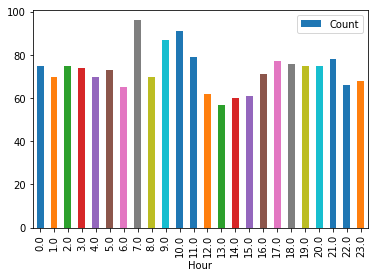

In [10]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')